<a href="https://colab.research.google.com/github/duy60th2wru/ABC/blob/master/Biomedical_Image_Analysis_Part6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: Liên kết google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# prompt: Liên kết tới Image_Processing trong drive

%cd /content/drive/MyDrive/Image_Processing

/content/drive/MyDrive/Image_Processing


In [19]:
!ls "/content/drive/MyDrive/Image_Processing/Dataset/Brain Tumor CT scan Images/Tumor"


'ct_tumor (1000).jpg'  'ct_tumor (1636).jpg'  'ct_tumor (36).jpg'
'ct_tumor (1001).jpg'  'ct_tumor (1637).jpg'  'ct_tumor (36).png'
'ct_tumor (1002).jpg'  'ct_tumor (1638).jpg'  'ct_tumor (370).jpg'
'ct_tumor (1003).jpg'  'ct_tumor (1639).jpg'  'ct_tumor (371).jpg'
'ct_tumor (1004).jpg'  'ct_tumor (163).jpg'   'ct_tumor (372).jpg'
'ct_tumor (1005).jpg'  'ct_tumor (1640).jpg'  'ct_tumor (373).jpg'
'ct_tumor (1006).jpg'  'ct_tumor (1641).jpg'  'ct_tumor (374).jpg'
'ct_tumor (1007).jpg'  'ct_tumor (1642).jpg'  'ct_tumor (375).jpg'
'ct_tumor (1008).jpg'  'ct_tumor (1643).jpg'  'ct_tumor (376).jpg'
'ct_tumor (1009).jpg'  'ct_tumor (1644).jpg'  'ct_tumor (377).jpg'
'ct_tumor (100).jpg'   'ct_tumor (1645).jpg'  'ct_tumor (378).jpg'
'ct_tumor (100).png'   'ct_tumor (1646).jpg'  'ct_tumor (379).jpg'
'ct_tumor (1010).jpg'  'ct_tumor (1647).jpg'  'ct_tumor (37).jpg'
'ct_tumor (1011).jpg'  'ct_tumor (1648).jpg'  'ct_tumor (37).png'
'ct_tumor (1012).jpg'  'ct_tumor (1649).jpg'  'ct_tumor (380).jpg'

Shape of the transformed image: (548, 466, 3)
Center of Mass: (np.float64(271.7666605126718), np.float64(217.85317907332737))
Shape of the Downsampled Image: (274, 233)
Shape of the Upsampled Image: (1096, 932)


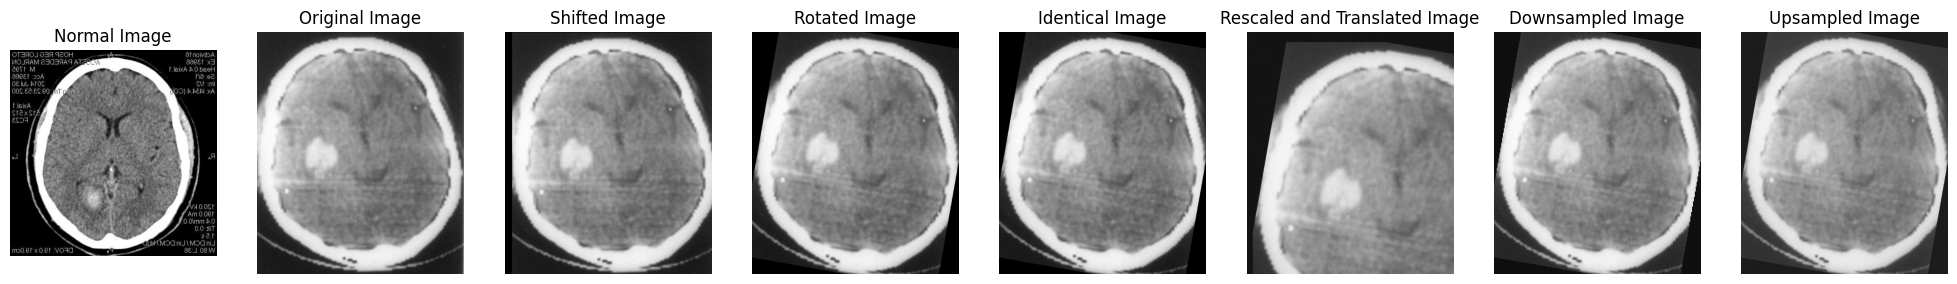

In [20]:
import imageio.v2 as imageio
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
import os

# Đường dẫn đến thư mục chứa ảnh trong Google Drive của bạn
image_directory = "/content/drive/MyDrive/Image_Processing/Dataset/Brain Tumor CT scan Images/Tumor"

# Giả sử có một ảnh tên là 'ct_healthy (361).png' từ kết quả của ô XgPtSIQ4MFNI,
# và giả sử 'transformed.jpg' cũng nằm trong cùng thư mục này.
# Bạn có thể cần điều chỉnh tên tệp dựa trên các tệp thực tế của mình.
img_path = os.path.join(image_directory, "ct_tumor (34).jpg") # Sử dụng một ảnh từ output của ô XgPtSIQ4MFNI
transformed_path = os.path.join(image_directory, "ct_tumor (34).png") # Giả sử tệp này tồn tại trong cùng thư mục

try:
    # Đọc ảnh
    img = imageio.imread(img_path)
    transformed = imageio.imread(transformed_path)

    print("Shape of the transformed image:", transformed.shape)

    # Đảm bảo ảnh transformed là ảnh màu nếu cần cho việc tính tâm khối
    if transformed.ndim == 2:
      transformed_color = np.stack((transformed,)*3, axis=-1)
    else:
      transformed_color = transformed

    # Tính tâm khối (center of mass) của ảnh transformed
    com = ndi.center_of_mass(np.mean(transformed_color, axis=2))
    print("Center of Mass:", com)

    # Tính toán độ dịch chuyển để đưa tâm ảnh về giữa
    d0 = transformed.shape[0] / 2 - com[0]
    d1 = transformed.shape[1] / 2 - com[1]

    # Dịch chuyển ảnh
    shifted = ndi.shift(transformed, shift=[d0, d1, 0])

    # Xoay ảnh
    rotated = ndi.rotate(shifted, angle=-10, reshape=False)

    # Ma trận biến đổi affine identity (không làm thay đổi ảnh)
    mat = [[1, 0, 0],
           [0, 1, 0],
           [0, 0, 1]]

    # Ma trận biến đổi affine để thay đổi tỉ lệ và dịch chuyển
    mat2 = [[0.8, 0, -20],
            [0, 0.8, -10],
            [0, 0, 1]]

    # Áp dụng biến đổi identity (không thay đổi)
    identical = ndi.affine_transform(rotated, mat)

    # Chuyển ảnh sang ảnh xám nếu là ảnh màu
    if identical.ndim == 3:
      gray = np.dot(identical[..., :3], [0.2989, 0.5870, 0.1140])
    else:
      gray = identical

    # Áp dụng biến đổi affine để thay đổi tỉ lệ và dịch chuyển
    rescaled = ndi.affine_transform(gray, mat2)

    # Giảm kích thước ảnh (downsample)
    rotated_dn = ndi.zoom(gray, zoom=0.5)
    print("Shape of the Downsampled Image:", rotated_dn.shape)

    # Tăng kích thước ảnh (upsample)
    rotated_up = ndi.zoom(gray, zoom=2)
    print("Shape of the Upsampled Image:", rotated_up.shape)

    # Hiển thị các ảnh đã xử lý
    fig, axes = plt.subplots(1, 8, figsize=(25, 23))

    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Normal Image")
    axes[0].axis("off")

    axes[1].imshow(transformed, cmap="gray")
    axes[1].set_title("Original Image")
    axes[1].axis("off")

    axes[2].imshow(shifted, cmap="gray")
    axes[2].set_title("Shifted Image")
    axes[2].axis("off")

    axes[3].imshow(rotated, cmap="gray")
    axes[3].set_title("Rotated Image")
    axes[3].axis("off")

    axes[4].imshow(identical, cmap="gray")
    axes[4].set_title("Identical Image")
    axes[4].axis("off")

    axes[5].imshow(rescaled, cmap="gray")
    axes[5].set_title("Rescaled and Translated Image")
    axes[5].axis("off")

    axes[6].imshow(rotated_dn, cmap="gray")
    axes[6].set_title("Downsampled Image")
    axes[6].axis("off")

    axes[7].imshow(rotated_up, cmap="gray")
    axes[7].set_title("Upsampled Image")
    axes[7].axis("off")

    plt.show()

except FileNotFoundError as e:
    print(f"Lỗi: {e}. Vui lòng đảm bảo các tệp hình ảnh tồn tại trong thư mục đã chỉ định.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

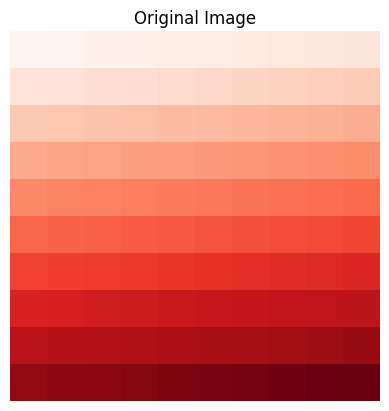

In [21]:
img = np.arange(100).reshape([10, 10])
plt.imshow(img, cmap="Reds")
plt.title("Original Image")
plt.axis("off")
plt.show()

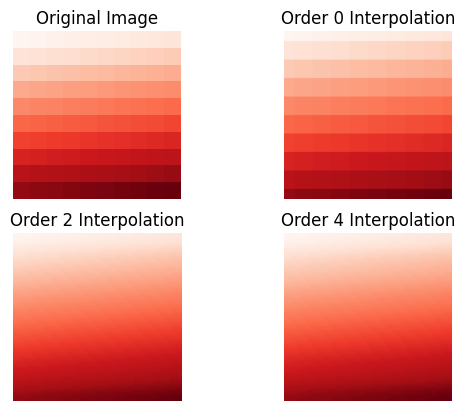

In [22]:
zm1 = ndi.zoom(img, zoom=10, order=0)
zm2 = ndi.zoom(img, zoom=10, order=2)
zm3 = ndi.zoom(img, zoom=10, order=4)

fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(img, cmap="Reds")
axes[0, 0].axis("off")
axes[0, 0].set_title("Original Image")

axes[0, 1].imshow(zm1, cmap="Reds")
axes[0, 1].axis("off")
axes[0, 1].set_title("Order 0 Interpolation")

axes[1, 0].imshow(zm2, cmap="Reds")
axes[1, 0].axis("off")
axes[1, 0].set_title("Order 2 Interpolation")

axes[1, 1].imshow(zm3, cmap="Reds")
axes[1, 1].axis("off")
axes[1, 1].set_title("Order 4 Interpolation")

plt.show()

Original shape: (548, 466)
Upsampled shape: (2192, 1864)


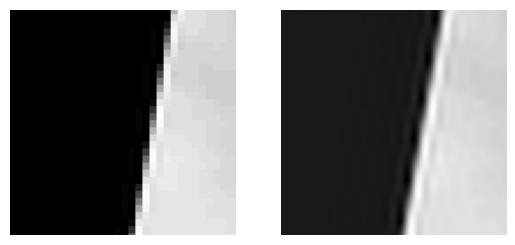

In [30]:
up0 = ndi.zoom(gray, zoom=4, order=0)
up5 = ndi.zoom(gray, zoom=4, order=5)

print("Original shape:", gray.shape)
print("Upsampled shape:", up0.shape)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0[128:256, 128:256], cmap="gray")
axes[1].imshow(up5[128:256, 128:256], cmap="gray")

for ax in axes:
  ax.axis("off")

plt.show()